# Probabilidad y Estadistica para Machine Learning 
Una de las bases fundamentales para entender los algoritmos de ML es la probabilidad y estadistica ya que te dan la intuicion para poder resolver los problemas.

* [Probabilidad y Estadistica por Stanford](https://stanford.edu/~shervine/teaching/cs-229/refresher-probabilities-statistics)
* [Estadistica para DL ](http://web.mit.edu/~csvoss/Public/usabo/stats_handout.pdf)
* [Probability Cheatsheet](https://static1.squarespace.com/static/54bf3241e4b0f0d81bf7ff36/t/55e9494fe4b011aed10e48e5/1441352015658/probability_cheatsheet.pdf)
* [Awesome Math](https://github.com/llSourcell/learn_math_fast)
* [Statistics for ML practical book](ftp://ftp.cea.fr/pub/unati/people/educhesnay/pystatml/StatisticsMachineLearningPythonDraft.pdf)
* [Probability Review](http://www.cs.toronto.edu/~urtasun/courses/CSC2515/Tutorial-ReviewProbability.pdf)

## Analisis Exploratorio de los Datos 
El analisis exploratorio de datos es lo primero que haces antes de resolver un problema en Machine Learning ya que te permite conocer las variables, caracteristicas y singularidades de tus datos. 



datos=pd.read_csv('path\nombre_archivo.csv')

In [0]:
import pandas as pd # Manejo de datos
import numpy as np # computacion numerica
import matplotlib.pyplot as plt # Visualizacion de datos
import seaborn as sns # Visualizacion 

# Datos 
all_states=pd.read_csv('https://assets.datacamp.com/production/course_1549/datasets/2008_all_states.csv')
df_swing=pd.read_csv('https://assets.datacamp.com/production/course_1549/datasets/2008_swing_states.csv')
belmont=pd.read_csv('https://assets.datacamp.com/production/course_1549/datasets/belmont.csv')
speed_of_light=pd.read_csv('https://assets.datacamp.com/production/course_1549/datasets/michelson_speed_of_light.csv')

In [2]:
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


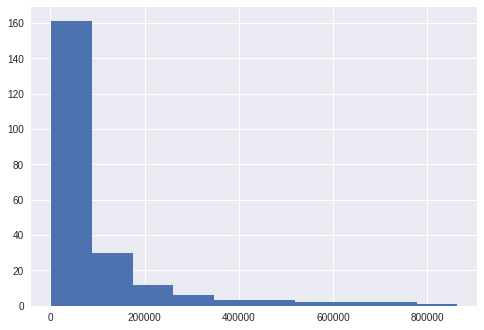

In [3]:
# Histograma
sns.set()
plt.hist(df_swing['total_votes'])
plt.show()

#### Swarm plot
Te permite encontrar una correlacion entre variables categoricas y numericas y como estan distribuidos sus datos

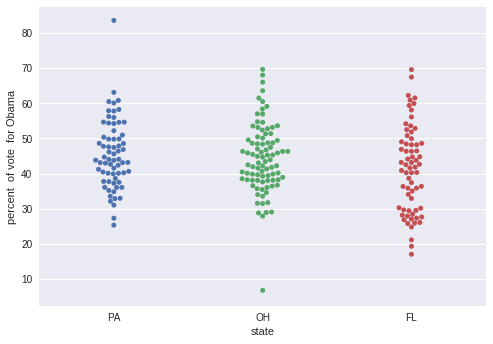

In [4]:
# Swarm plots
sns.swarmplot(x='state', y='dem_share', data=df_swing)
plt.xlabel('state')
plt.ylabel('percent  of vote  for Obama')
plt.show()

#### Cumulative distribution function

Es una funcion que describe la probabilidad de un suceso aleatorio. 

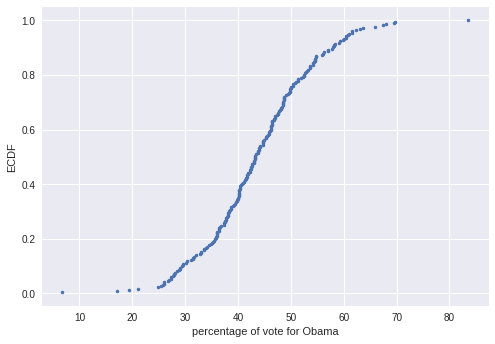

In [5]:
x=np.sort(df_swing['dem_share'])
y=np.arange(1, len(x)+1)/ len(x)
plt.plot(x,y, marker='.',linestyle='none')
plt.xlabel('percentage of vote for Obama')
plt.ylabel('ECDF')
plt.show()


#### Computar la  ECDF
Este es un ejemplo de como se construye la C.D.F. (Funcion de Distribucion Cumulativa)

In [0]:
def ecdf(data):
    """Calcula la ECDF para un vector de una-dimension."""

    # Number of data points: n
    n=len(data)

    # x-data for the ECDF: x
    x=np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

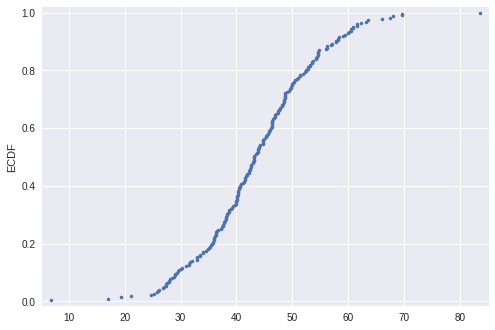

In [7]:
x_ob, y_ecdf= ecdf(df_swing['dem_share'])
_=plt.plot(x_ob, y_ecdf, marker='.', linestyle='none')
_=plt.margins(0.02)
_=plt.ylabel('ECDF')
plt.show()

### Pearson correlation coefficient
 The Pearson correlation coefficient, also called the Pearson r, is often easier to interpret than the covariance. It is computed using the `np.corrcoef()` function. Like `np.cov()`, it takes two arrays as arguments and returns a 2D array. Entries [0,0] and [1,1] are necessarily equal to 1 (can you think about why?), and the value we are after is entry [0,1].
 
 

In [0]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

total_votes=df_swing['total_votes']
dem_s=df_swing['dem_share']

# Compute Pearson correlation coefficient for I. versicolor: r
r=pearson_r(total_votes,dem_s)

# Print the result
print(r)

0.536197364959


### Thinking probabilistically -- Discrete variables
Statistical inference rests upon probability. Because we can very rarely say anything meaningful with absolute certainty from data, we use probabilistic language to make quantitative statements about data. In this chapter, you will learn how to think probabilistically about discrete quantities, those that can only take certain values, like integers. It is an important first step in building the probabilistic language necessary to think statistically.
#### Random number generators and hacker statistics
**Generating random numbers using the np.random module**

We will be hammering the `np.random` module for the rest of this course and its sequel. Actually, you will probably call functions from this module more than any other while wearing your hacker statistician hat. Let's start by taking its simplest function, `np.random.random()` for a test spin. The function returns a random number between zero and one. Call `np.random.random()` a few times in the IPython shell. You should see numbers jumping around between zero and one.

In this exercise, we'll generate lots of random numbers between zero and one, and then plot a histogram of the results. If the numbers are truly random, all bars in the histogram should be of (close to) equal height.

You may have noticed that, in the video, Justin generated 4 random numbers by passing the keyword argument size=4 to np.random.random(). Such an approach is more efficient than a for loop: in this exercise, however, you will write a for loop to experience hacker statistics as the practice of repeating an experiment over and over again.


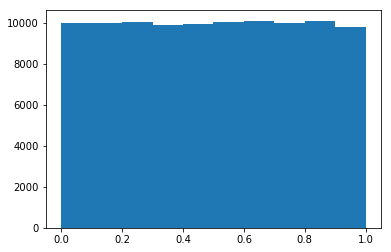

In [0]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()

#### The np.random module and Bernoulli trials
You can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability *p* of landing heads (success) and probability *1−p* of landing tails (failure). In this exercise, you will write a function to perform n Bernoulli trials, `perform_bernoulli_trials(n, p)`, which returns the number of successes out of n Bernoulli trials, each of which has probability p of success. To perform each Bernoulli trial, use the `np.random.random()` function, which returns a random number between zero and one.

In [0]:
def perform_bernoulli_trials(n,p):
    """"Perform n Bernoilli trials with success probability p and return number of successes"""
    
    n_success=0
    
    for i in range(n):
        random_number=np.random.random()
        
        if random_number<p:
            n_success+=1
        
         
    
    return n_success
    

In [0]:
perform_bernoulli_trials(8,0.2)

3

#### How many defaults might we expect?
Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the `perform_bernoulli_trials()` function you wrote in the previous exercise and record how many defaults we get. Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to True, i.e., did the loan recipient default?) You will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.

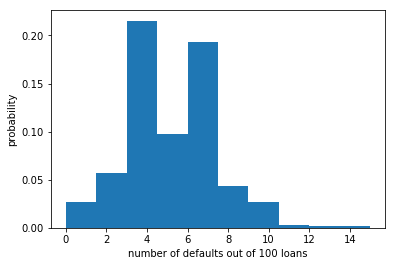

In [0]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults=np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100,0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

#### Will the bank fail?
Plot the number of defaults you got from the previous exercise, in your namespace as n_defaults, as a CDF. The ecdf() function you wrote in the first chapter is available.

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

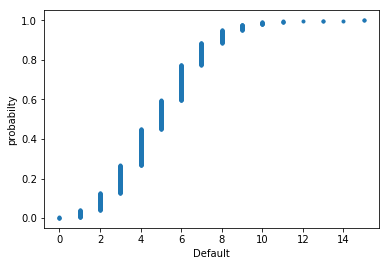

Probability of losing money = 0.022


In [0]:
# Compute ECDF: x, y
x,y= ecdf(n_defaults)

# Plot the ECDF with labeled axes
_=plt.plot(x,y,linestyle='none',marker='.')
_=plt.ylabel('probabilty')
_=plt.xlabel('Default')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money=np.sum(n_defaults>=10)
    

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

### Probability distributions and stories: The Binomial distribution

**Probability mass fuction (PMF)**: The set of probabilities of discrete outcomes

** Probability Distribution** : A mathematical description of outcomes

** Binomal distribution** 

The number *r* of successes in *n* Bernoulli trials with probability *p* of success, is Binomially distributed

In many cases, it is appropriate to summarize a group of independent observations by the number of observations in the group that represent one of two outcomes. For example, the proportion of individuals in a random sample who support one of two political candidates fits this description. In this case, the statistic **p**  is the count X of voters who support the candidate divided by the total number of individuals in the group n. This provides an estimate of the parameter p, the proportion of individuals who support the candidate in the entire population.
    
The binomial distribution describes the behavior of a count variable X if the following conditions apply:

   * The number of observations n is fixed.
   * Each observation is independent.
   * Each observation represents one of two outcomes ("success" or "failure").
   * The probability of "success" p is the same for each outcome.
   
If these conditions are met, then X has a binomial distribution with parameters n and p, abbreviated *B(n,p)*.

The binomial coefficient, stated as "n choose k," or the number of possible ways to choose k "successes" from n observations. For example, the number of ways to achieve 2 heads in a set of four tosses is "4 choose 2", or 4!/2!2! = (4x3)/(2x1) = 6. The possibilities are {HHTT, HTHT, HTTH, TTHH, THHT, THTH}, where "H" represents a head and "T" represents a tail. The binomial coefficient multiplies the probability of one of these possibilities (which is (1/2)²(1/2)² = 1/16 for a fair coin) by the number of ways the outcome may be achieved, for a total probability of 6/16.

#### Sampling out of the Binomial distribution
Compute the probability mass function for the number of defaults we would expect for 100 loans as in the last section, but instead of simulating all of the Bernoulli trials, perform the sampling using `np.random.binomial()`. This is identical to the calculation you did in the last set of exercises using your custom-written `perform_bernoulli_trials()` function, but far more computationally efficient. Given this extra efficiency, we will take 10,000 samples instead of 1000. After taking the samples, plot the CDF as last time. This CDF that you are plotting is that of the Binomial distribution.


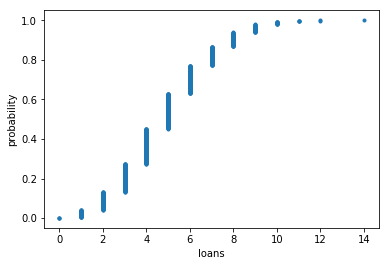

In [0]:
np.random.seed(42)

# Take 10,000 samples out of the binomial distribution
n_defaults=np.random.binomial(100,0.05, size=1000)

#Return 2 values, when 'y' is the probability 
x,y=ecdf(n_defaults)

# Plot the CDF with axis labels
_=plt.plot(x,y, marker= '.',linestyle='none')
_=plt.xlabel('loans')
_=plt.ylabel('probability')


# Show the plot
plt.show()


#### Plotting the Binomial PMF
Plotting a nice looking PMF requires a bit of matplotlib trickery that we will not go into here. Instead, we will plot the PMF of the Binomial distribution as a histogram with skills you have already learned. The trick is setting up the edges of the bins to pass to `plt.hist()` via the bins keyword argument. We want the bins centered on the integers. So, the edges of the bins should be `-0.5, 0.5, 1.5, 2.5`, ... up to `max(n_defaults) + 1.5`. You can generate an array like this using `np.arange()` and then subtracting 0.5 from the array.

You have already sampled out of the Binomial distribution during your exercises on loan defaults, and the resulting samples are in the NumPy array `n_defaults`.

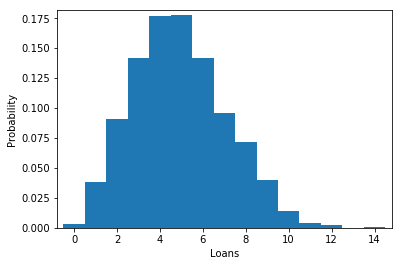

In [0]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
plt.hist(n_defaults, bins=bins, normed=True)

# Set margins
plt.margins(0.02)

# Label axes
plt.xlabel('Loans')
plt.ylabel('Probability')

# Show the plot
plt.show()

### Poisson processes and the Poisson distribution
Poisson procces counts the number of arrivals and how the system react to the arrival. For ej. a call of a telefone and how the system react to stocastic evets like the call(arrival)

#### Relationship between Binomial and Poisson distributions
You just heard that the Poisson distribution is a limit of the Binomial distribution for rare events. This makes sense if you think about the stories. Say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes. This is just like the Poisson story we discussed in the video, where we get on average 6 hits on a website per hour. So, the Poisson distribution with arrival rate equal to npnp approximates a Binomial distribution for nn Bernoulli trials with probability pp of success (with nn large and pp small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

Let's explore these two distributions computationally. You will compute the mean and standard deviation of samples from a Poisson distribution with an arrival rate of 10. Then, you will compute the mean and standard deviation of samples from a Binomial distribution with parameters nn and pp such that np=10np=10.

*The standard deviation of the Binomial distribution gets closer and closer to that of the Poisson distribution as the probability p gets lower and lower.*

In [0]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson=np.random.poisson(10,10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n=[20,100,1000]
p=[0.5,0.1,0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size=10000)
    
    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

Poisson:      9.9881 3.15784077971
n = 20 Binom: 10.0222 2.2492014494
n = 100 Binom: 10.0776 3.01227127596
n = 1000 Binom: 10.0481 3.14801308606


#### Baseball problem
In baseball, a no-hitter is a game in which a pitcher does not allow the other team to get a hit. This is a rare event, and since the beginning of the so-called modern era of baseball (starting in 1901), there have only been 251 of them through the 2015 season in over 200,000 games. The ECDF of the number of no-hitters in a season is shown to the right. Which probability distribution would be appropriate to describe the number of no-hitters we would expect in a given season?

ANS=Both Binomial and Poisson, though Poisson is easier to model and compute.
##### Was 2015 anomalous?
1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

In [0]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters=np.random.poisson(251/115,10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters>=7)

# Compute probability of getting seven or more: p_large
p_large=n_large/10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)


Probability of seven or more no-hitters: 0.0071


## Thinking probabilistically-- Continuous 
Now it is time to move on to continuous variables, such as those that can take on any fractional value. Many of the principles are the same, but there are some subtleties. At the end of this last chapter of the course, you will be speaking the probabilistic language you need to launch into the inference techniques covered in the sequel to this course.

### Probability density functions
Mathematical description of the relative likelihood
of observing a value of a continuous variable.
Continuous analog to the PMF 

### Normal distribution
Describes a continuous variable whose
PDF has a single symmetric peak


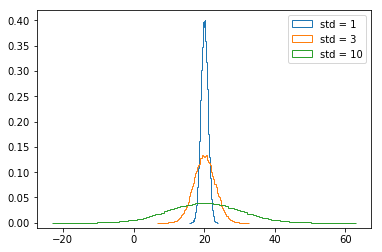

In [0]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10

samples_std1=np.random.normal(20,1, size=100000)

samples_std3 =np.random.normal(20,3, size=100000)
samples_std10=np.random.normal(20,10, size=100000)



# Make histograms
# histtype='step', makes the plot look much like the smooth theoretical PDF
_=plt.hist(samples_std1, bins=100, normed=True, histtype='step')
_=plt.hist(samples_std3, bins=100, normed=True, histtype='step')
_=plt.hist(samples_std10, bins=100, normed=True, histtype='step')


# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

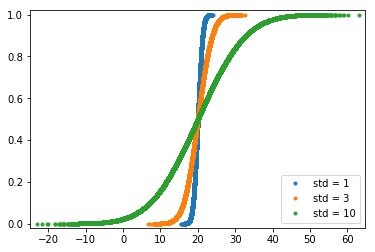

In [0]:
# The Normal CDF
# Generate CDFs
x_std1,y_std1=ecdf(samples_std1)
x_std3,y_std3=ecdf(samples_std3)
x_std10,y_std10=ecdf(samples_std10)


# Plot CDFs
_=plt.plot(x_std1,y_std1, marker='.', linestyle='none')
_=plt.plot(x_std3, y_std3, marker='.', linestyle='none')
_=plt.plot(x_std10, y_std10, marker='.', linestyle='none')
# Make 2% margin
plt.margins(0.02)

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

### The Normal distribution: Properties and warnings

#### Problem Belmont Stakes results
#### Are the Belmont Stakes results Normally distributed?
Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. With these two outliers removed from the data set, compute the mean and standard deviation of the Belmont winners' times. Sample out of a Normal distribution with this mean and standard deviation using the `np.random.normal()` function and plot a CDF. Overlay the ECDF from the winning Belmont times. Are these close to Normally distributed?


In [0]:
belmont.head()

,Year,Winner,Jockey,Trainer,Owner,Time,Track,miles
0,2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,2:28.51,Belmont,1.5
1,2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",2:26.65,Belmont,1.5
2,2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,2:28.52,Belmont,1.5
3,2013,Palace Malice,Mike Smith,Todd Pletcher,Dogwood Stable,2:30.70,Belmont,1.5
4,2012,Union Rags,John Velazquez,Michael Matz,Phyllis M. Wyeth,2:30.42,Belmont,1.5


#### Remove Outliers Using Normal Distribution and S.D.
I applied this rule successfully when I had to clean up data from millions of IoT devices generating heating equipment data. Each data point contained the electricity usage at a point of time.

However, sometimes the devices weren’t 100% accurate and would give very high or very low values.

We needed to remove these outlier values because they were making the scales on our graph unrealistic. The challenge was that the number of these outlier values was never fixed. Sometimes we would get all valid values and sometimes these erroneous readings would cover as much as 10% of the data points.

Our approach was to remove the outlier points by eliminating any points that were above (Mean + 2*SD) and any points below (Mean - 2*SD) before plotting the frequencies.

You don’t have to use 2 though, you can tweak it a little to get a better outlier detection formula for your data.

In [0]:
belmont_no_outliers=np.array([ 148.51,  146.65,  148.52,  150.7 ,  150.42,  150.88,  151.57,
        147.54,  149.65,  148.74,  147.86,  148.75,  147.5 ,  148.26,
        149.71,  146.56,  151.19,  147.88,  149.16,  148.82,  148.96,
        152.02,  146.82,  149.97,  146.13,  148.1 ,  147.2 ,  146.  ,
        146.4 ,  148.2 ,  149.8 ,  147.  ,  147.2 ,  147.8 ,  148.2 ,
        149.  ,  149.8 ,  148.6 ,  146.8 ,  149.6 ,  149.  ,  148.2 ,
        149.2 ,  148.  ,  150.4 ,  148.8 ,  147.2 ,  148.8 ,  149.6 ,
        148.4 ,  148.4 ,  150.2 ,  148.8 ,  149.2 ,  149.2 ,  148.4 ,
        150.2 ,  146.6 ,  149.8 ,  149.  ,  150.8 ,  148.6 ,  150.2 ,
        149.  ,  148.6 ,  150.2 ,  148.2 ,  149.4 ,  150.8 ,  150.2 ,
        152.2 ,  148.2 ,  149.2 ,  151.  ,  149.6 ,  149.6 ,  149.4 ,
        148.6 ,  150.  ,  150.6 ,  149.2 ,  152.6 ,  152.8 ,  149.6 ,
        151.6 ,  152.8 ,  153.2 ,  152.4 ,  152.2 ])

The theoretical CDF and the ECDF of the data suggest that the winning Belmont times are, indeed, Normally distributed. This also suggests that in the last 100 years or so, there have not been major technological or training advances that have significantly affected the speed at which horses can run this race.

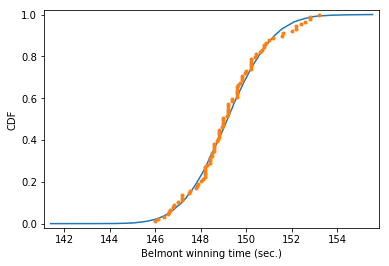

In [0]:
# Compute mean and standard deviation: mu, sigma
mu=np.mean(belmont_no_outliers)
sigma=np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples=np.random.normal(mu,sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor=ecdf(samples)
x,y=ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

In [0]:
samples=np.random.normal(mu,sigma, size=1000000)
prob=len(samples[samples<144.0])/len(samples)
# Print the result
print('Probability of besting Secretariat:', prob)


Probability of besting Secretariat: 0.000637


### The Exponential distribution
*The waiting time between arrivals of a Poisson process is Exponentially distributed*
In the real world, exponential distributions come up when we look at a series of events and measure the times between events, called interarrival times. If the events are equally likely to occur at any time, the distribution of **interarrival times**   tends to look like an exponential distribution.
#### If you have a story, you can simulate it!
Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, fear not! You can always simulate it. We'll do that in this and the next exercise.

In earlier exercises, we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

How long must we wait to see both a no-hitter and a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

Now, you will write a function to sample out of the distribution described by this story.

In [0]:
def successive_poisson(tau1, tau2, size=1):
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2,size)

    return t1 + t2

#### Distribution of no-hitters and cycles
Now, you'll use your sampling function to compute the waiting time to observer a no-hitter and hitting of the cycle. The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

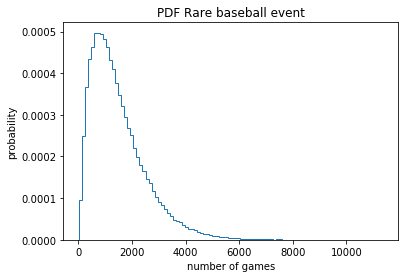

In [0]:
# Draw samples of waiting times: waiting_times
waiting_times=successive_poisson(764,715,100000)

# Make the histogram
_=plt.hist(waiting_times, bins=100, normed=True, histtype='step')


# Label axes
_=plt.xlabel('number of games')
_=plt.ylabel('probability')
_=plt.title('PDF Rare baseball event')

# Show the plot
plt.show()

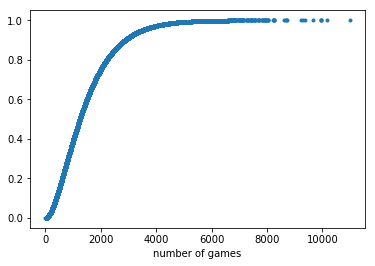

In [0]:
# CDF

x_no,y_no=ecdf(waiting_times)

_=plt.plot(x_no,y_no, marker='.', linestyle='none')
_=plt.xlabel('number of games')
plt.show()